Baksi, Cooper, Lannan

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14,'font.family': 'sans-serif'})

In [ ]:
# Parameters or discretization:
deltax = 1
deltax2 = deltax**2
deltat = 0.1 
L = 500
N = int (L/deltax) 
Np1 = N + 1 

# Parameters for IC
x0 = 200
sigma = 20
sigma2 = sigma**2
q = 2 

# Potential parameters 
A = 250
B = 260
V0 = 0.7


def x(k):
  # position from index
  return k*deltax

def t(k):
  # time from index
  return k*deltat

def mod(phi):
  # |psi(t,x)|^2
  return np.real( ( phi*np.conj(phi) ) )

def ic(phi):
  # initial conditions 
  for k in range(len(phi)):
    X = x(k)
    phi[k] = np.exp(1j * q * X) * np.exp( - (X-x0)**2/2/sigma2 )

def V(x):
  # potential
  if((x-A)*(x-B)<0):
    return V0
  return 0 

def Gamma(k):
  # Gamma
  X = x(k)
  return 2*(1j*2*deltax2/deltat - 1 - deltax2*V(X))

def a_func():
  # returns a_k as an array 
  a = np.zeros(Np1)+1j*np.zeros(Np1)
  a[1] = - Gamma(1)
  for k in range(2,N):
    a[k] = -1/a[k-1] - Gamma(k)
  return a; 

def Omega_func(phi):
  # returns Omega^n_k as an array 
  Omega = np.zeros(Np1)+1j*np.zeros(Np1)
  for k in range(1,N):
    X = x(k)
    Omega[k] = - phi[k-1] + 2 * (2 * 1j * deltax2 / deltat + 1 + deltax2 * V(X)) * phi[k] - phi[k+1]
  return Omega

def b_func(a, Omega):
  # returns b^n_k as an array
  b = np.zeros(Np1)+1j*np.zeros(Np1)
  b[1] = Omega[1]
  for k in range(2,N):
    b[k] = b[k-1]/a[k-1] + Omega[k]
  return b 

def phi_iter(a, phi):
  # performs iterations 
  Omega = Omega_func(phi)
  b = b_func(a, Omega)
  for k in range(N-1,0,-1):
    phi[k] = phi[k+1]/a[k]+b[k]/a[k]


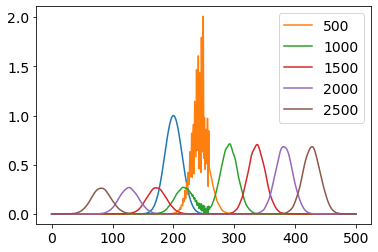

In [ ]:
phi = np.zeros(Np1)+1j*np.zeros(Np1)
ic(phi)
plt.plot(mod(phi))

a = a_func()
epoch = 0

for n in range (500): 
  phi_iter(a, phi)
  epoch += 1
plt.plot(mod(phi), label=str(epoch))

for n in range (500): 
  phi_iter(a, phi)
  epoch += 1
plt.plot(mod(phi), label=str(epoch))

for n in range (500): 
  phi_iter(a, phi)
  epoch += 1
plt.plot(mod(phi), label=str(epoch))

for n in range (500): 
  phi_iter(a, phi)
  epoch += 1
plt.plot(mod(phi), label=str(epoch))

for n in range (500): 
  phi_iter(a, phi)
  epoch += 1
plt.plot(mod(phi), label=str(epoch))

plt.legend()

In [ ]:
%pylab inline
# Parameters or discretization:
deltax = 1
deltax2 = deltax**2
deltat = 0.1 
L = 500
N = int (L/deltax) 
Np1 = N + 1 

# Parameters for IC
x0 = 200
sigma = 20
sigma2 = sigma**2
q = 2 

# Potential parameters 
A = 250
B = 260
V0 = 1.1


def x(k):
  # position from index
  return k*deltax

def t(k):
  # time from index
  return k*deltat

def mods(phi): #mod was an incompatable name
  # |psi(t,x)|^2
  return np.real( ( phi*np.conj(phi) ) )

def ic(phi):
  # initial conditions 
  for k in range(len(phi)):
    X = x(k)
    phi[k] = np.exp(1j * q * X) * np.exp( - (X-x0)**2/2/sigma2 )

def V(x):
  # potential
  if((x-A)*(x-B)<0):
    return V0
  return 0 

def Gamma(k):
  # Gamma
  X = x(k)
  return 2*(1j*2*deltax2/deltat - 1 - deltax2*V(X))

def a_func():
  # returns a_k as an array 
  a = np.zeros(Np1)+1j*np.zeros(Np1)
  a[1] = - Gamma(1)
  for k in range(2,N):
    a[k] = -1/a[k-1] - Gamma(k)
  return a; 

def Omega_func(phi):
  # returns Omega^n_k as an array 
  Omega = np.zeros(Np1)+1j*np.zeros(Np1)
  for k in range(1,N):
    X = x(k)
    Omega[k] = - phi[k-1] + 2 * (2 * 1j * deltax2 / deltat + 1 + deltax2 * V(X)) * phi[k] - phi[k+1]
  return Omega

def b_func(a, Omega):
  # returns b^n_k as an array
  b = np.zeros(Np1)+1j*np.zeros(Np1)
  b[1] = Omega[1]
  for k in range(2,N):
    b[k] = b[k-1]/a[k-1] + Omega[k]
  return b 

def phi_iter(a, phi):
  # performs iterations 
  Omega = Omega_func(phi)
  b = b_func(a, Omega)
  for k in range(N-1,0,-1):
    phi[k] = phi[k+1]/a[k]+b[k]/a[k]

phi = np.zeros(Np1)+1j*np.zeros(Np1)
ic(phi)

a = a_func()
Sl = []
for n in range(10000): 
  phi_iter(a, phi)
  if n%50 == 0: #grabs ever few phis for speed
    Sl.append(mods(phi))

# that graph was kinda ugly so i animated it
import matplotlib.animation as animation
from IPython.display import HTML
%matplotlib notebook

potential = []
for i in range(1,N):
  potential.append(V(i))

fig = plt.figure(figsize=(10,10))
im = fig.add_subplot()
im.plot(Sl[0])
def animate_func(i):
    im.clear()
    im.plot(Sl[i])
    im.set_ylim([0,2])
    im.plot(potential)
    return [im]
anim = animation.FuncAnimation(fig, animate_func, frames=len(Sl), interval=100); #change interval to change the default frame time
HTML(anim.to_jshtml())
#anim.save('wavefunction.mp4', writer=animation.FFMpegFileWriter(fps=15, metadata=dict(artist='Me'), bitrate=1800)) #saves a copy but doesnt work in colab, needs ffmpeg installed. Uncommenting causes video to not play in colab

Output hidden; open in https://colab.research.google.com to view.

In [2]:
%pylab inline
# Parameters or discretization:
deltax = 1
deltax2 = deltax**2
deltat = 0.1 
L = 500
N = int (L/deltax) 
Np1 = N + 1 

# Parameters for IC
x0 = 200
sigma = 20
sigma2 = sigma**2
q = 2 

# Potential parameters 
A = 250
B = 260
V0 = 1.2


def x(k):
  # position from index
  return k*deltax

def t(k):
  # time from index
  return k*deltat

def mods(phi): #mod was an incompatable name
  # |psi(t,x)|^2
  return np.real( ( phi*np.conj(phi) ) )

def ic(phi):
  # initial conditions 
  for k in range(len(phi)):
    X = x(k)
    phi[k] = np.exp(1j * q * X) * np.exp( - (X-x0)**2/2/sigma2 )

def V(x):
  # potential
  if x > A-100 and x < B-100:
    return V0
  if x > A and x < B:
    return V0
  return 0 

def Gamma(k):
  # Gamma
  X = x(k)
  return 2*(1j*2*deltax2/deltat - 1 - deltax2*V(X))

def a_func():
  # returns a_k as an array 
  a = np.zeros(Np1)+1j*np.zeros(Np1)
  a[1] = - Gamma(1)
  for k in range(2,N):
    a[k] = -1/a[k-1] - Gamma(k)
  return a; 

def Omega_func(phi):
  # returns Omega^n_k as an array 
  Omega = np.zeros(Np1)+1j*np.zeros(Np1)
  for k in range(1,N):
    X = x(k)
    Omega[k] = - phi[k-1] + 2 * (2 * 1j * deltax2 / deltat + 1 + deltax2 * V(X)) * phi[k] - phi[k+1]
  return Omega

def b_func(a, Omega):
  # returns b^n_k as an array
  b = np.zeros(Np1)+1j*np.zeros(Np1)
  b[1] = Omega[1]
  for k in range(2,N):
    b[k] = b[k-1]/a[k-1] + Omega[k]
  return b 

def phi_iter(a, phi):
  # performs iterations 
  Omega = Omega_func(phi)
  b = b_func(a, Omega)
  for k in range(N-1,0,-1):
    phi[k] = phi[k+1]/a[k]+b[k]/a[k]

phi = np.zeros(Np1)+1j*np.zeros(Np1)
ic(phi)

a = a_func()
Sl = []
for n in range(10000): 
  phi_iter(a, phi)
  if n%100 == 0: #grabs ever few phis for speed
    Sl.append(mods(phi))

# that graph was kinda ugly so i animated it
import matplotlib.animation as animation
from IPython.display import HTML
%matplotlib notebook

potential = []
for i in range(1,N):
  potential.append(V(i))

fig = plt.figure(figsize=(10,10))
im = fig.add_subplot()
im.plot(Sl[0])
def animate_func(i):
    im.clear()
    im.plot(Sl[i])
    im.set_ylim([0,2])
    im.plot(potential)
    return [im]
anim = animation.FuncAnimation(fig, animate_func, frames=len(Sl), interval=100); #change interval to change the default frame time
HTML(anim.to_jshtml())

Output hidden; open in https://colab.research.google.com to view.